# Practicing Classification Techniques
The primary purpose of this document is to test multiple classfication techniques to understand supversied learning methods. I will be using Google's Tensorflow to implement Deep Neural Networks. The complete list of techniques can be seen as:
1. Support Vector Machine(SVM)
2. Logistic Regression (LOG)
3. K-NN (KNN)
4. Deep Neural Networks (DNN)
    
## Notebook's Direction
I will discuss the following topics to understand these methods at a deeper level and discuss the performance of these techniques:
* Generation of Train and Test Data
* Implement Techniques in R
* Comparison of Techniques


## Generate Train and Test Data 
Data will be generated by modifying the variance within the normal distribution so that two variables indicates a response. Thus, 3 different data sets were used to understand how variation effects the performance of these techniques. The data sets can be described as the following:
* Distinguishable (small variation, standard deviation is 1)
* Medium Distinguishable (medium variation, standard deviation is 12)
* Not Distinguishable (large variation, standard deviation is 21)

The values were chosen to show how variation plays a major role in distingushing the classification of the data 

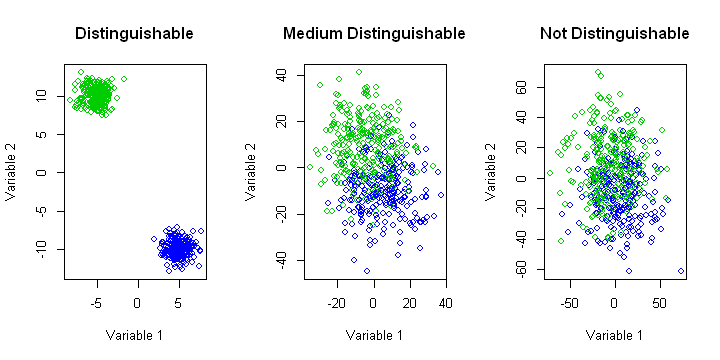

In [56]:
library(repr)
library(class)
library(e1071)
library(ggplot2)
library(reshape2)
library(tensorflow)
library(tfestimators)

#mnist = read.csv("traindata.csv")
options(warn=-1)
set.seed(100)
n = 500
# Genrate Train Y
y <- c(rep(1, n/2), rep(0, n/2))

# Generate Train and Test X under A
Var1 <- c(rnorm(n/2, 5, 1), rnorm(n/2, -5, 1))
Var2 <- c(rnorm(n/2, -10, 1), rnorm(n/2, 10, 1))
x_A <- matrix(c(Var1, Var2), nrow = n, ncol = 2)
data_A = data.frame(y,Var1,Var2)

## Create Train and Test Data sets
partitions_A <- modelr::resample_partition(data_A, c(test = 0.2, train = 0.8))
md_train_A <- as.data.frame(partitions_A$train)
md_test_A  <- as.data.frame(partitions_A$test)



# Generate Train and Test X under B
Var1 <- c(rnorm(n/2, 5, 12), rnorm(n/2, -5, 12))
Var2 <- c(rnorm(n/2, -10, 12), rnorm(n/2, 10, 12))
x_B <- matrix(c(Var1, Var2), nrow = n, ncol = 2)
data_B = data.frame(y,Var1,Var2)


## Create Train and Test Data sets
partitions_B <- modelr::resample_partition(data_B, c(test = 0.2, train = 0.8))
md_train_B <- as.data.frame(partitions_B$train)
md_test_B  <- as.data.frame(partitions_B$test)


# Generate Train and Test X under C
Var1 <- c(rnorm(n/2, 5, 21), rnorm(n/2, -5, 21))
Var2 <- c(rnorm(n/2, -10, 21), rnorm(n/2, 10, 21))
x_C <- matrix(c(Var1, Var2), nrow = n, ncol = 2)
data_C = data.frame(y,Var1,Var2)


## Create Train and Test Data sets
partitions_C <- modelr::resample_partition(data_C, c(test = 0.2, train = 0.8))
md_train_C <- as.data.frame(partitions_C$train)
md_test_C  <- as.data.frame(partitions_C$test)


# Plot Data
options(repr.plot.width=6, repr.plot.height=3)
par(mfrow=c(1,3))
plot(x_A[,1],x_A[,2],col=y+3, 
     ylab="Variable 2",
    xlab="Variable 1",
    main="Distinguishable")
plot(x_B[,1],x_B[,2],col=y+3, 
     ylab="Variable 2",
    xlab="Variable 1",
    main="Medium Distinguishable")
plot(x_C[,1],x_C[,2],col=y+3, 
     ylab="Variable 2",
    xlab="Variable 1",
    main="Not Distinguishable")


In [57]:
# 1. SVM 
# Run Model A 
model_A_SVM <- svm(y~., data = md_train_A)
# Estimate Train and Test
est_train_A_SVM = ifelse(predict(model_A_SVM,md_train_A[,-1])>0.5,1,0)
est_test_A_SVM = ifelse(predict(model_A_SVM,md_test_A[,-1])>0.5,1,0)
 
# Run Model B
model_B_SVM <- svm(y~., data = md_train_B)
# Estimate Train and Test
est_train_B_SVM = ifelse(predict(model_B_SVM,md_train_B[,-1])>0.5,1,0)
est_test_B_SVM = ifelse(predict(model_B_SVM,md_test_B[,-1])>0.5,1,0)

# Run Model C
model_C_SVM <- svm(y~., data = md_train_C)
# Estimate Train and Test
est_train_C_SVM = ifelse(predict(model_C_SVM,md_train_C[,-1])>0.5,1,0)
est_test_C_SVM = ifelse(predict(model_C_SVM,md_test_C[,-1])>0.5,1,0)


cat("Test SVM Distinguishable")
table(pred = est_test_A_SVM, true=md_test_A[,1])

cat("Test SVM Medium Distinguishable")
table(pred = est_test_B_SVM, true=md_test_B[,1])

cat("Test SVM Not Distinguishable")
table(pred = est_test_C_SVM, true=md_test_C[,1])


Test SVM Distinguishable

    true
pred  0  1
   0 52  0
   1  0 47

Test SVM Medium Distinguishable

    true
pred  0  1
   0 34  6
   1 14 45

Test SVM Not Distinguishable

    true
pred  0  1
   0 27 23
   1 13 36

In [58]:
#2. Logistic Regression
# Run Model A
model_A_LOG <- glm(y~., data = md_train_A, family=binomial)
# Estimate Train and Test
est_train_A_LOG <- ifelse(predict(model_A_LOG,md_train_A[,-1])>0,1,0)
est_test_A_LOG = ifelse(predict(model_A_LOG,md_test_A[,-1])>0,1,0)

# Run Model B
model_B_LOG <- glm(y~., data = md_train_B, family=binomial)
# Estimate Train and Test
est_train_B_LOG <- ifelse(predict(model_B_LOG,md_train_B[,-1])>0,1,0)
est_test_B_LOG = ifelse(predict(model_B_LOG,md_test_B[,-1])>0,1,0)

# Run Model C
model_C_LOG <- glm(y~., data = md_train_C, family=binomial)
# Estimate Train and Test
est_train_C_LOG <- ifelse(predict(model_C_LOG,md_train_C[,-1])>0,1,0)
est_test_C_LOG = ifelse(predict(model_C_LOG,md_test_C[,-1])>0,1,0)




cat("Test Logistic Distinguishable")
table(pred = est_test_A_LOG, true=md_test_A[,1])

cat("Test Logistic Medium Distinguishable")
table(pred = est_test_B_LOG, true=md_test_B[,1])

cat("Test Logistic Not Distinguishable")
table(pred = est_test_C_LOG, true=md_test_C[,1])
 

Test Logistic Distinguishable

    true
pred  0  1
   0 52  0
   1  0 47

Test Logistic Medium Distinguishable

    true
pred  0  1
   0 38  9
   1 10 42

Test Logistic Not Distinguishable

    true
pred  0  1
   0 27 17
   1 13 42

In [59]:
#3. K-NN

# Run Model A
est_tt_A_KNN <- knn(as.matrix(md_train_A[,-1]),
              rbind(as.matrix(md_train_A[,-1]),as.matrix(md_test_A[,-1])),
              md_train_A[,1],
              k = 2,
              prob=FALSE)
# Estimate Train and Test
est_train_A_KNN <- est_tt_A_KNN[1:(0.8*n + 1)]
est_test_A_KNN <- est_tt_A_KNN[(0.8*n + 2):n]




# Run Model B
est_tt_B_KNN <- knn(as.matrix(md_train_B[,-1]),
              rbind(as.matrix(md_train_B[,-1]),as.matrix(md_test_B[,-1])),
              md_train_B[,1],
              k = 2,
              prob=FALSE)
# Estimate Train and Test
est_train_B_KNN <- est_tt_B_KNN[1:(0.8*n + 1)]
est_test_B_KNN <- est_tt_B_KNN[(0.8*n + 2):n]





# Run Model C
est_tt_C_KNN <- knn(as.matrix(md_train_C[,-1]),
              rbind(as.matrix(md_train_C[,-1]),as.matrix(md_test_C[,-1])),
              md_train_C[,1],
              k = 2,
              prob=FALSE)
# Estimate Train and Test
est_train_C_KNN <- est_tt_C_KNN[1:(0.8*n + 1)]
est_test_C_KNN <- est_tt_C_KNN[(0.8*n + 2):n]




cat("Test KNN Distinguishable")
table(pred = est_test_A_KNN, true=md_test_A[,1])

cat("Test KNN Medium Distinguishable")
table(pred = est_test_B_KNN, true=md_test_B[,1])

cat("Test KNN Not Distinguishable")
table(pred = est_test_C_KNN, true=md_test_C[,1])

Test KNN Distinguishable

    true
pred  0  1
   0 52  0
   1  0 47

Test KNN Medium Distinguishable

    true
pred  0  1
   0 35 13
   1 13 38

Test KNN Not Distinguishable

    true
pred  0  1
   0 23 27
   1 17 32

In [60]:


## 1) Specify response and data
response <- function() "y"
features <- function() setdiff(names(data_A), response())

    
# 2) Construct feature columns
feature_columns <- feature_columns(
  column_numeric(features())
)
# 3) Construct input function 
md_input_fn <- function(data) {
  input_fn(data, features = features(), response = response())
}
      
    
# 4) Construct a dnn classifier
classifier_A <- dnn_classifier(
  feature_columns = feature_columns,
  hidden_units = c(10, 20),
  n_classes = 2
)
classifier_B <- dnn_classifier(
  feature_columns = feature_columns,
  hidden_units = c(10, 25,15),
  n_classes = 2
)
classifier_C <- dnn_classifier(
  feature_columns = feature_columns,
  hidden_units = c(10, 25,15),
  n_classes = 2
)
         
# 5) train classifier with training dataset
train(classifier_A, input_fn = md_input_fn(md_train_A))
train(classifier_B, input_fn = md_input_fn(md_train_B))
train(classifier_C, input_fn = md_input_fn(md_train_C))


# 6) Predict values for Test
predictions_A <- predict(classifier_A, input_fn = md_input_fn(md_test_A))
est_test_A_DNN <- vapply(1:nrow(predictions_A), function(i) {
  predictions_A$classes[[i]]
}, character(1))
predictions_B <- predict(classifier_B, input_fn = md_input_fn(md_test_B))
est_test_B_DNN <- vapply(1:nrow(predictions_B), function(i) {
  predictions_B$classes[[i]]
}, character(1))
predictions_C <- predict(classifier_C, input_fn = md_input_fn(md_test_C))
est_test_C_DNN <- vapply(1:nrow(predictions_C), function(i) {
  predictions_C$classes[[i]]
}, character(1))








cat("DNN Distinguishable")
table(pred = est_test_A_DNN, true=md_test_A[,1])

cat("DNN Medium Distinguishable")
table(pred = est_test_B_DNN, true=md_test_B[,1])

cat("DNN Not Distinguishable")
table(pred = est_test_C_DNN, true=md_test_C[,1])













DNN Distinguishable

    true
pred  0  1
   0 52  0
   1  0 47

DNN Medium Distinguishable

    true
pred  0  1
   0 40  9
   1  8 42

DNN Not Distinguishable

    true
pred  0  1
   0 28 19
   1 12 40

In [1]:
results <- rbind(
      cbind(mean(est_test_A_DNN!=md_test_A[,1]),
            mean(est_test_B_DNN!=md_test_B[,1]),
            mean(est_test_C_DNN!=md_test_C[,1])),
      cbind(mean(est_test_A_SVM!=md_test_A[,1]),
            mean(est_test_B_SVM!=md_test_B[,1]),
            mean(est_test_C_SVM!=md_test_C[,1])),
      cbind(mean(est_test_A_KNN!=md_test_A[,1]),
            mean(est_test_B_KNN!=md_test_B[,1]),
            mean(est_test_C_KNN!=md_test_C[,1])),
      cbind(mean(est_test_A_LOG!=md_test_A[,1]),
            mean(est_test_B_LOG!=md_test_B[,1]),
            mean(est_test_C_LOG!=md_test_C[,1])))
colnames(results) <- c("SD equals 1","SD equals 12","SD equals 21")
rownames(results) <- c("DNN","SVM","KNN","LOG")
results[order(results[,3]),]

ERROR: Error in mean(est_test_A_DNN != md_test_A[, 1]): object 'est_test_A_DNN' not found


# Comparison Techniques
All methods are able to distingush between two levels when the variance is small
Ranking of Methods:

1. LOG
2. DNN
3. SVM
4. KNN

The logistic regression was able to recover the outcomes than the deep network model only when the variance was large but the deep network worked better than the logistic regression when the variance was intermediate. There are many reasons for these unexpected results. DNN did might not have enough layers and nodes per each layer. SVM did not considered the cost function and was set to default value. KNN only considered two neigbhors, which lead to its poor performance. Cross validations with respect to each of the techniques must be studied to tune each technique to fit the data in best manner.


